
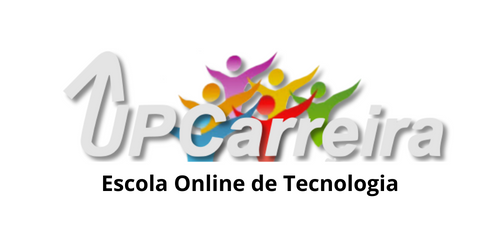
---

#DataFrames Pandas - Análise de Dados: Previsão de Vendas e Data Wrangling de Vendas de Cursos Online de Engenharia Civil 

Os Dados Macroeconomicos como Piso Salarial e Taxa de Ocupação são exclusivos para Engenheiro Civil, adapte esses dados para o seu negócio.

Fonte Salário Mínimo: https://www.dieese.org.br/analisecestabasica/salarioMinimo.html

Piso Salarial Engenheiro Civil = 6X Salário Mínimo 

Taxa de Ocupalçao - Fonte: Cadastro Geral de Empregados e Desempregados (CAGED)

Link: https://www.gov.br/trabalho-e-previdencia/pt-br/servicos/empregador/caged

Professor [Claudio Antonio]) 



Curso Análise de Dados, acesse: https://www.upcarreira.com.br/curso-analise-de-dados/



**Conteúdo Complementar e Exercícios:**
https://www.w3resource.com/python-exercises/pandas/index.php

---

# **Impordando a Base e Entendendo os Dados**


In [1]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 42.1 MB/s 
     |████████████████████████████████| 679 kB 41.0 MB/s 
     |████████████████████████████████| 102 kB 8.4 MB/s 
     |████████████████████████████████| 62 kB 347 kB/s 
     |████████████████████████████████| 4.7 MB 34.4 MB/s 
     |████████████████████████████████| 296 kB 52.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7eb7e810e4591af18fda70b94c4072be2809f8ae75525d70a5f4b4ffd9706640
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found ex

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
pd.options.display.float_format =   '{:,.2f}'.format
%matplotlib inline


In [12]:
!wget -q "https://raw.githubusercontent.com/claudio-m-antonio/upcarreira-course-utils/main/develop/dataset/Faturamento_Anua_Escola_Engenharia_Civil.csv" -O Faturamento_Anua_Escola_Engenharia_Civil.csv

In [13]:
base1 = pd.read_csv('Faturamento_Anua_Escola_Engenharia_Civil.csv', sep=',')

In [14]:
base1

,Ano,Mes,Vendas
0,2014,janeiro,0
1,2014,fevereiro,0
2,2014,marco,0
3,2014,abril,401
4,2014,maio,0
...,...,...,...
103,2022,agosto,"389,44"
104,2022,setembro,"304,33"
105,2022,outubro,"750,29"
106,2022,novembro,0


In [ ]:
base1['Mes'] = base1['Mes'].replace(['janeiro', 'fevereiro', 'marco', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [ ]:
base1

In [ ]:
base1.info()

In [ ]:
base1["Vendas"] = base1["Vendas"].str.replace(',','.').astype(float)

In [ ]:
base1

In [ ]:
base1.info()

In [15]:
!wget -q "https://raw.githubusercontent.com/claudio-m-antonio/upcarreira-course-utils/main/develop/dataset/Dados_Macroeconomicos.csv" -O Dados_Macroeconomicos.csv

In [17]:
base2 = pd.read_csv("Dados_Macroeconomicos.csv")

In [19]:
base2

,Ano,Salario Minimo,Inflacao,Piso Salarial,PIB,Taxa Ocupacao,Taxa Selic
0,2012,622,"5,84%",3732,"1,92%",85979,"8,17%"
1,2013,678,"5,9%",4068,"3,00%",69456,"7,92%"
2,2014,724,"6,41%",4344,"0,5%",36267,"10,40%"
3,2015,788,"10,67%",4728,"-3,55%",-2597,"12,54%"
4,2016,880,"6,29%",5280,"-3,31%",-628,"13,20%"
5,2017,937,"2,95%",5622,"1,06%",10987,"9,53%"
6,2018,954,"3,75%",5724,"1,12%",11921,"6,24%"
7,2019,998,"4,31%",5988,"1,14%",10486,"5,79%"
8,2020,1045,"4,52%",6270,"-4,1%",298695,"2,72%"
9,2021,1100,"10,06%",6600,"4,6%",245367,"4,35%"


In [18]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano              11 non-null     int64 
 1   Salario Minimo   11 non-null     int64 
 2   Inflacao         11 non-null     object
 3   Piso Salarial    11 non-null     int64 
 4   PIB              11 non-null     object
 5   Taxa Ocupacao    11 non-null     int64 
 6   Taxa Selic       11 non-null     object
dtypes: int64(4), object(3)
memory usage: 744.0+ bytes


In [ ]:
columns = ['Inflacao ', 'PIB', 'Taxa Selic'] 


In [ ]:
base2[columns] = base2[columns].apply(lambda x: x.str.replace(',', '.'))

In [ ]:
base2[columns] = base2[columns].apply(lambda x: x.str.replace('%', '').astype('float'))

In [ ]:
base2

In [ ]:
base2.info()

# **Combinação - Método Merge**

In [ ]:
base = pd.merge(left=base1, right=base2, on='Ano', how='inner')

In [ ]:
base

In [ ]:
base.info()

# **Verificar Valores Nulos**

Valores nulos em um DataFrame Pandas ocorrem quando o pacote não consegue interpretar o dado da fonte de dados, 

exemplos:

Colunas categóricas com valores vazios ();
Colunas numéricas com valores nulos (None); etc.

In [ ]:
base.isnull()

In [ ]:
base.isnull().any()

In [ ]:
base.isnull().any().any()

# Preenchimento

Exemplo: Preenchimento valores nulos com o método fillna:

# **Remover valores Nulos**

Exemplo: Remoção de linhas com algum valor nulo com o método dropna:

In [ ]:
#base = base.dropna()

# Preenchimento

Exemplo: Preenchimento valores nulos com o método fillna:

In [ ]:
#base.fillna('')

# Faturamento por Ano

In [ ]:
base_sum_df_ano = base[['Vendas', 'Ano']].groupby('Ano').agg('sum')

In [ ]:
base_sum_df_ano

In [ ]:
base_sum_df_ano.plot.bar(y='Vendas', figsize=(11, 6))

# Faturamento por Mês

In [ ]:
base_sum_df_mes = base[['Vendas', 'Mes']].groupby('Mes').agg('sum')

In [ ]:
base_sum_df_mes

In [ ]:
base_sum_df_mes.plot.bar(y='Vendas', figsize=(11, 6))

In [ ]:
report = ProfileReport(base)


In [ ]:
report

In [ ]:
report.to_file ( "previsao_vendas.html" )